In [4]:
import pandas as pd

In [ ]:
df_empty_count = pd.read_csv('https://raw.githubusercontent.com/Mikhaylov-yv/cnt_predict_lesson/refs/heads/main/data/cnt_empty_count.csv')
df_empty_count['dt'] = pd.to_datetime(df_empty_count['dt'])
df_empty_count = df_empty_count.set_index('dt')
df_empty_count


,Москва_20,Владивосток_20,Санкт-Петербург_20,Москва_40,Владивосток_40,Санкт-Петербург_40
dt,,,,,,
2006-01-01,0,0,0,0,0,1
2006-01-02,0,1,0,0,0,3
2006-01-03,0,1,0,0,1,3
2006-01-04,1,1,0,1,1,3
2006-01-05,1,1,2,0,2,3
...,...,...,...,...,...,...
2007-12-27,9,5,6,5,6,7
2007-12-28,9,4,7,5,5,6
2007-12-29,9,4,7,6,6,6


In [6]:
df_empty_count.describe()

,Москва_20,Владивосток_20,Санкт-Петербург_20,Москва_40,Владивосток_40,Санкт-Петербург_40
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,7.123288,6.586301,6.175342,6.231507,5.408219,5.879452
std,2.557140,2.782727,2.618798,2.744211,1.922486,2.571713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000
50%,7.000000,6.000000,6.000000,6.000000,5.000000,6.000000
75%,9.000000,9.000000,8.000000,8.000000,7.000000,8.000000
max,14.000000,14.000000,17.000000,13.000000,10.000000,13.000000


## Графики

<Axes: xlabel='dt'>

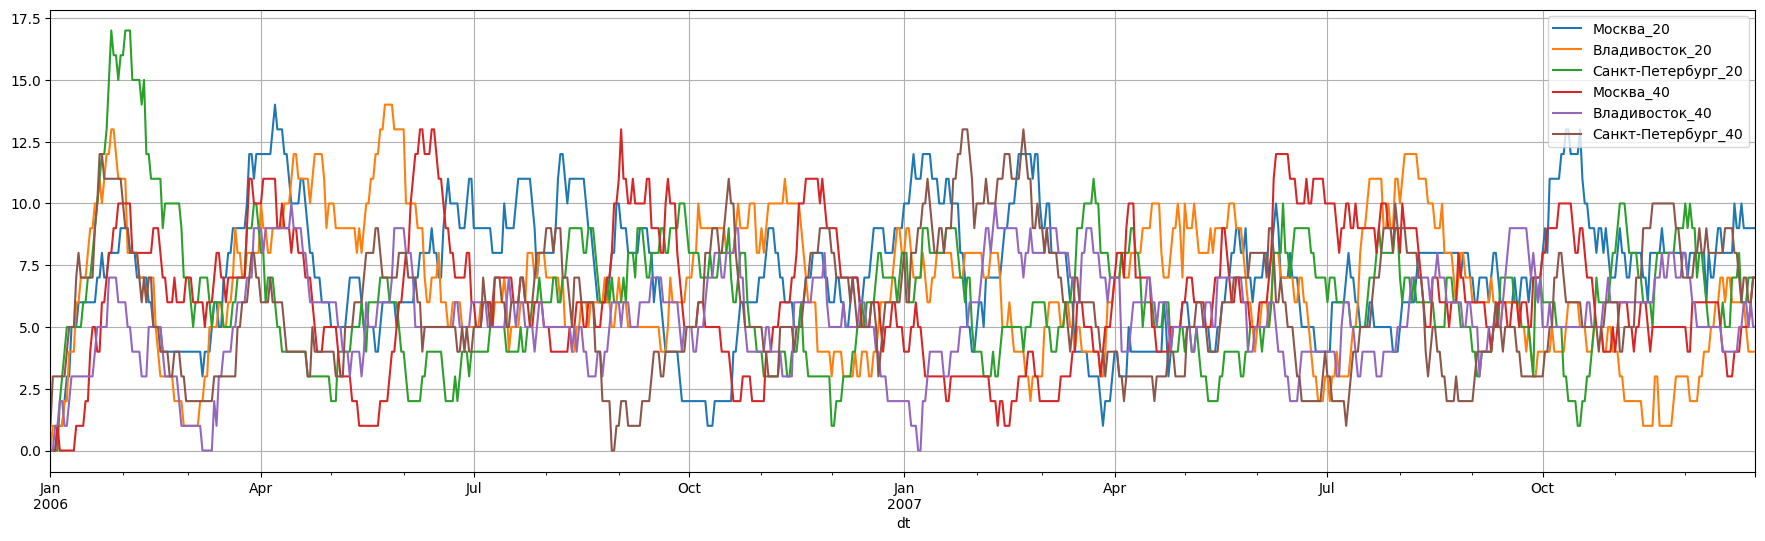

In [7]:
df_empty_count.plot(figsize=(22, 6), grid=True)

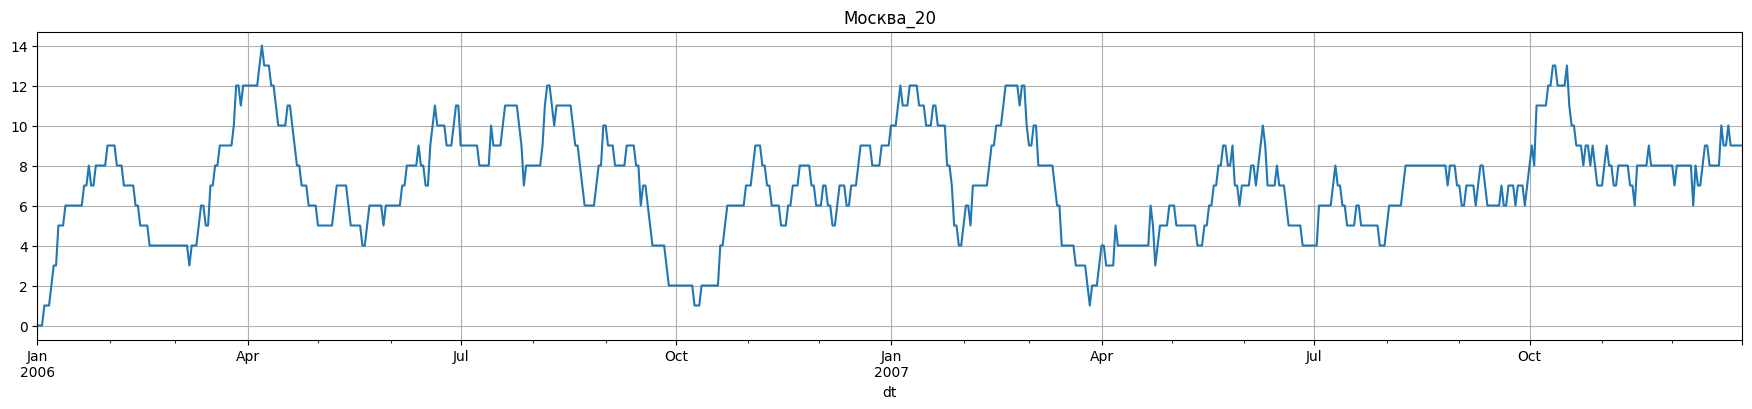

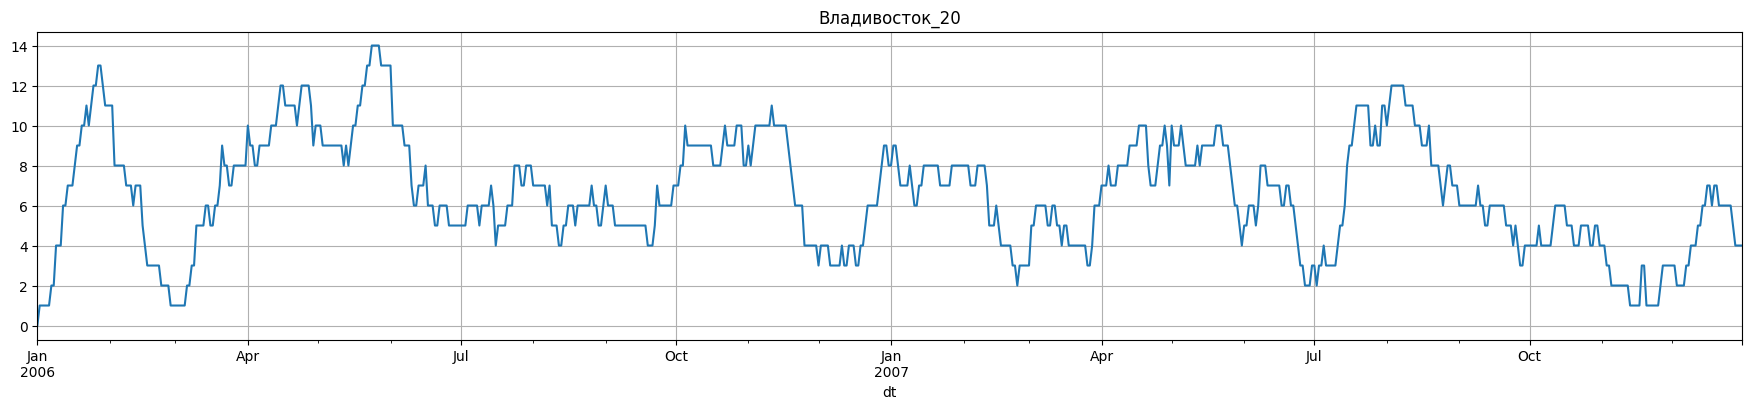

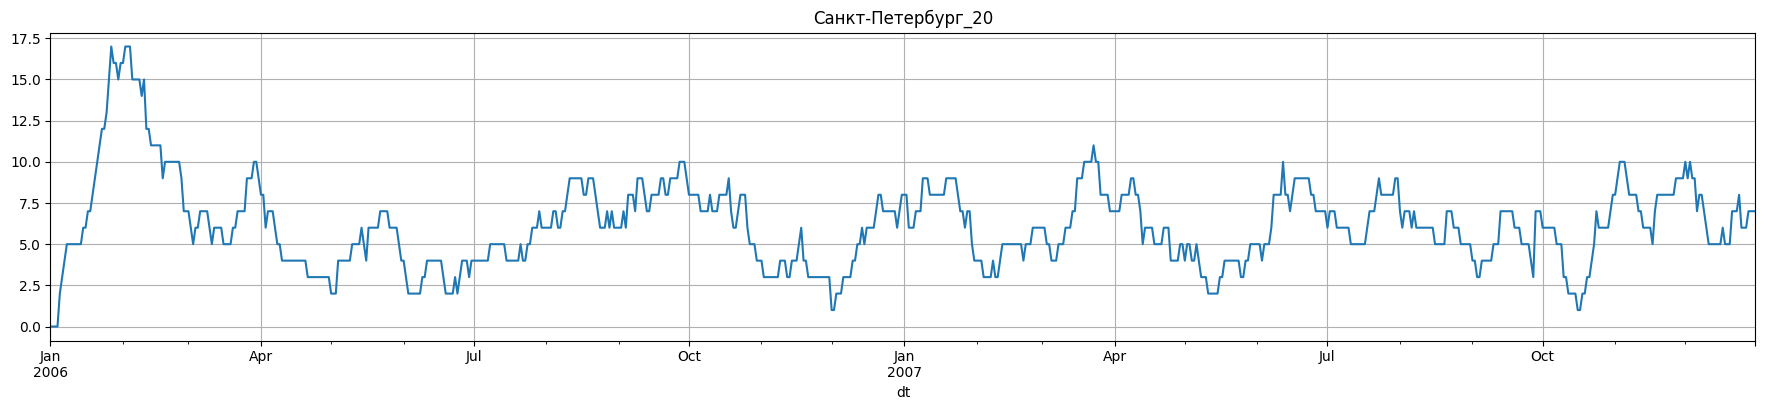

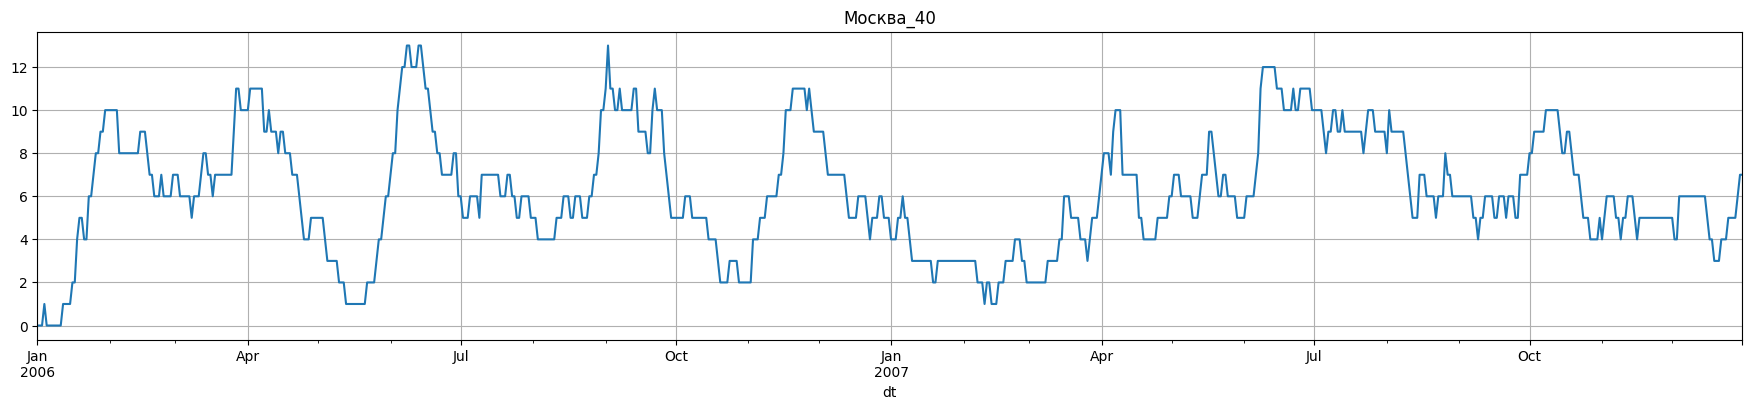

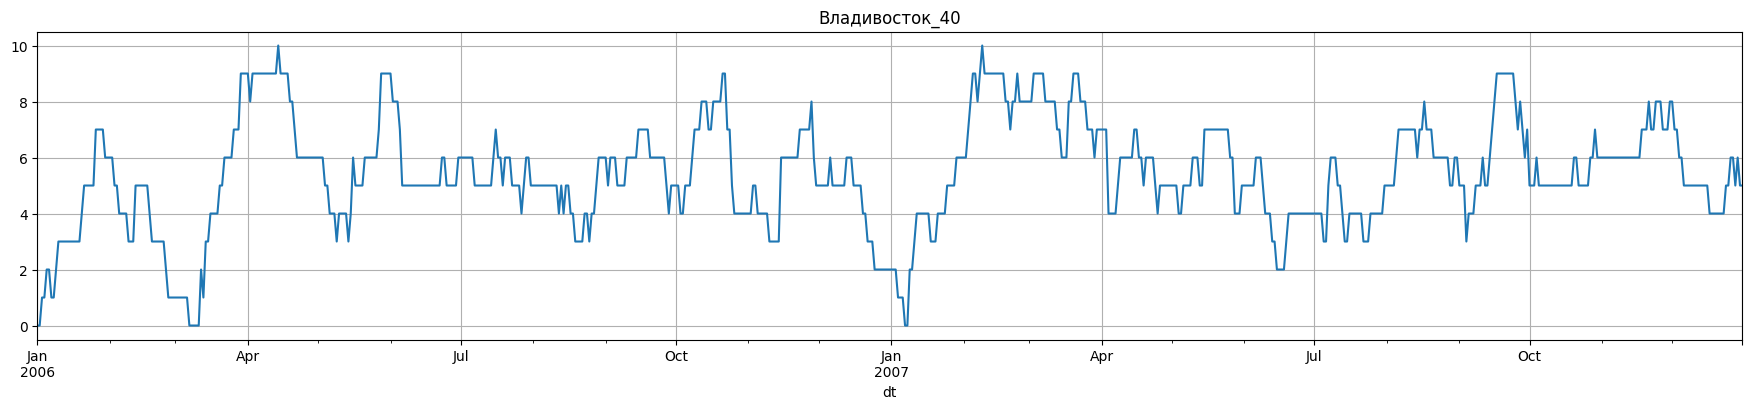

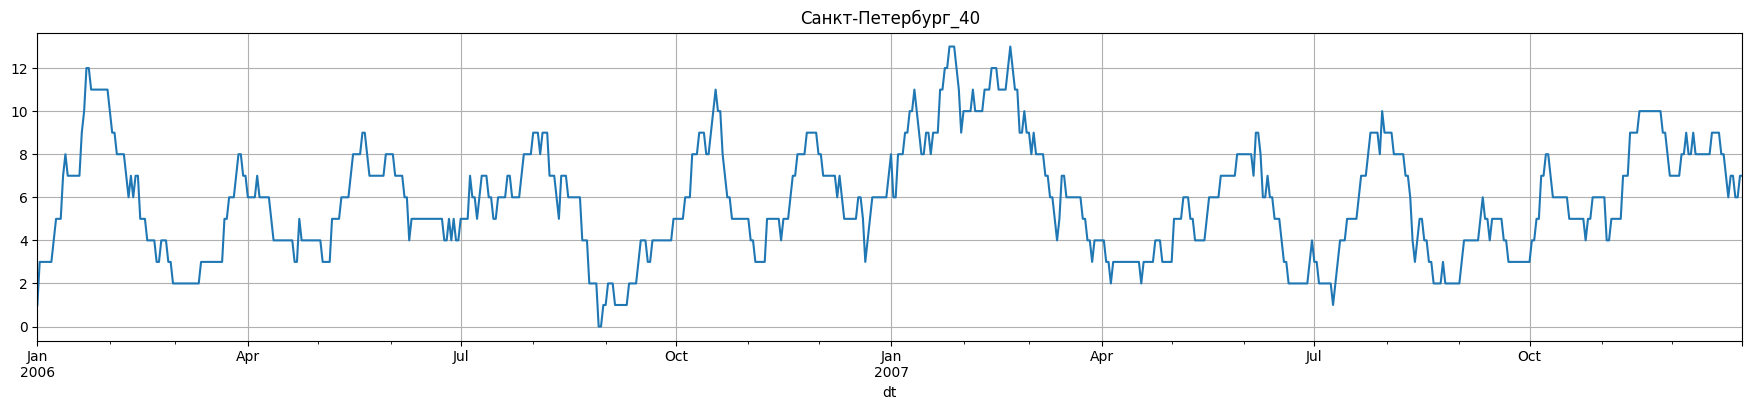

In [8]:
import matplotlib.pyplot as plt


for column in df_empty_count.columns:
    plt.figure(figsize=(22, 4))
    df_empty_count[column].plot(grid=True, title=column)
    plt.show()

Вывод:

Из линейных графиков особо ничего не понятно 

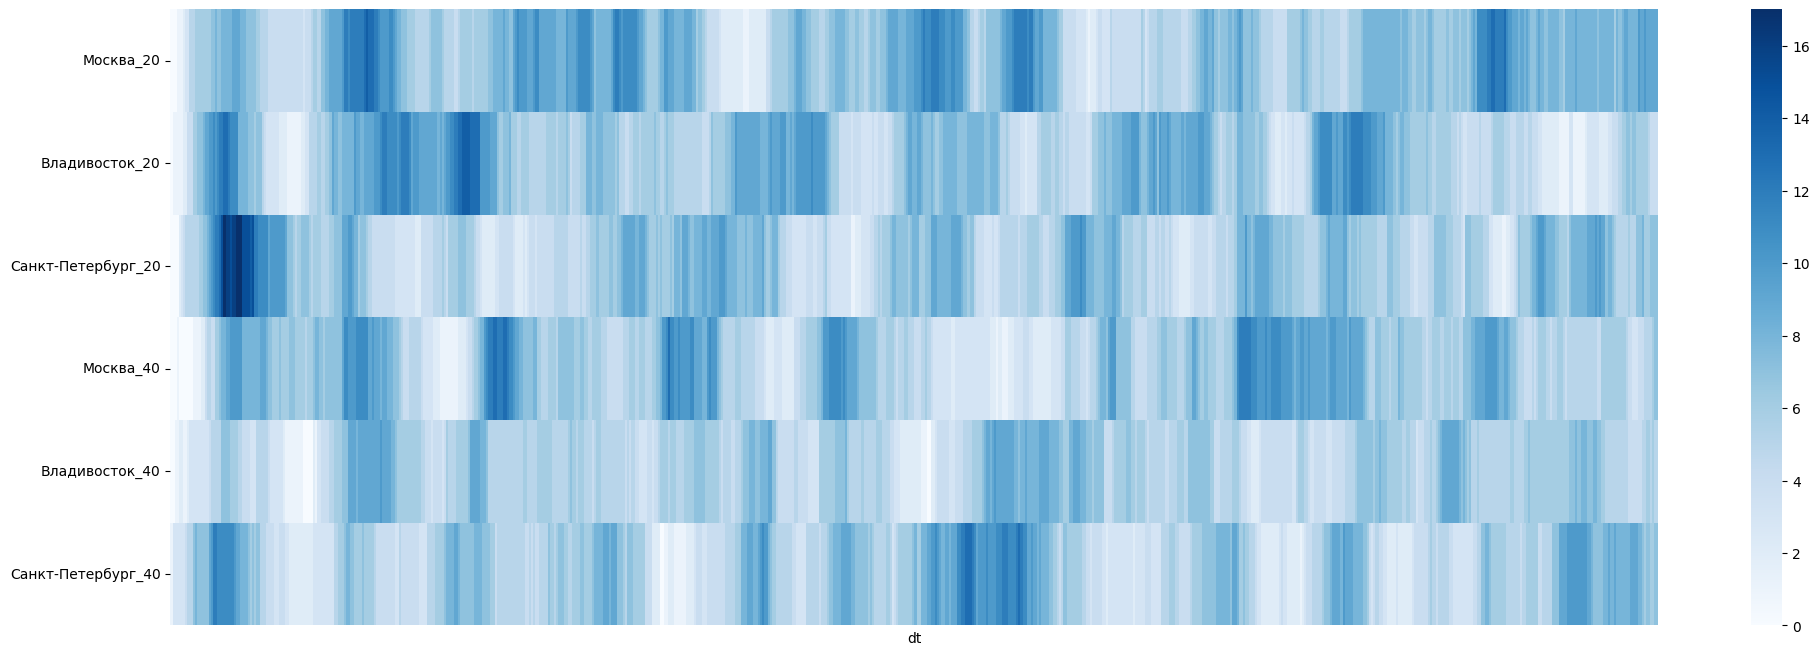

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 8))
sns.heatmap(
    df_empty_count.transpose(),
    cmap='Blues', 
    cbar=True,
    xticklabels=False
    )
plt.show()

Вывод:

Тут мы уже видим подтврджение очивидной гепотизы. Если где-то контейнеров стало мало то скоро их где-то станет много.

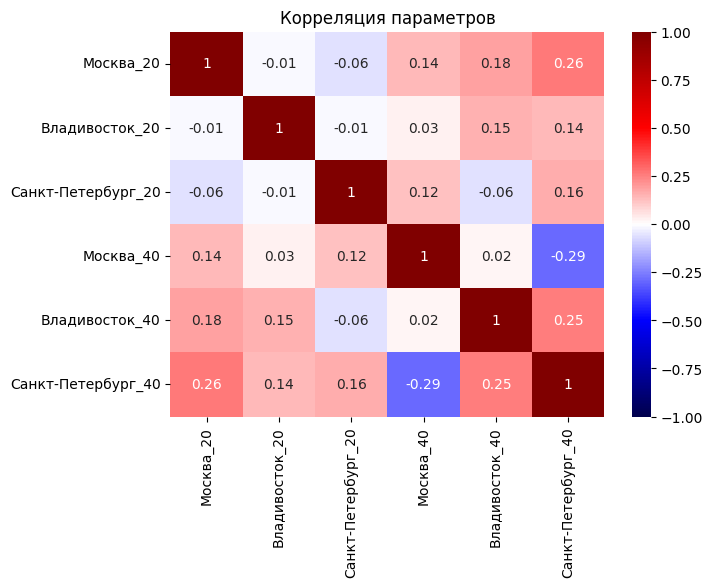

In [10]:
plt.figure(figsize=(7, 5))
sns.heatmap(
    df_empty_count.corr().round(2),
    cmap='seismic', 
    cbar=True,
    annot=True,
    vmin=-1, vmax=1
    )
plt.title('Корреляция параметров')
plt.show()

Вывод:

Это подтвеждает матрица корреляции:
Например в паре: `Москва_40` - `Санкт-Петербург_40` обратная зависимость `-0.29`
- Чем больше в Москве тем меньше в Питере

При это `Владивосток_40` - `Москва_40` прямая  `0.25`
- Чем больше в Москве тем больше во Владивостоке

## Задача прогнозирования

Задача прогнозирования заключатся в использовании известных данных для прогноза в будущее.
Для этого сместим данные на неделю назад с помошью `shift(-7)` и сопоставим с историей

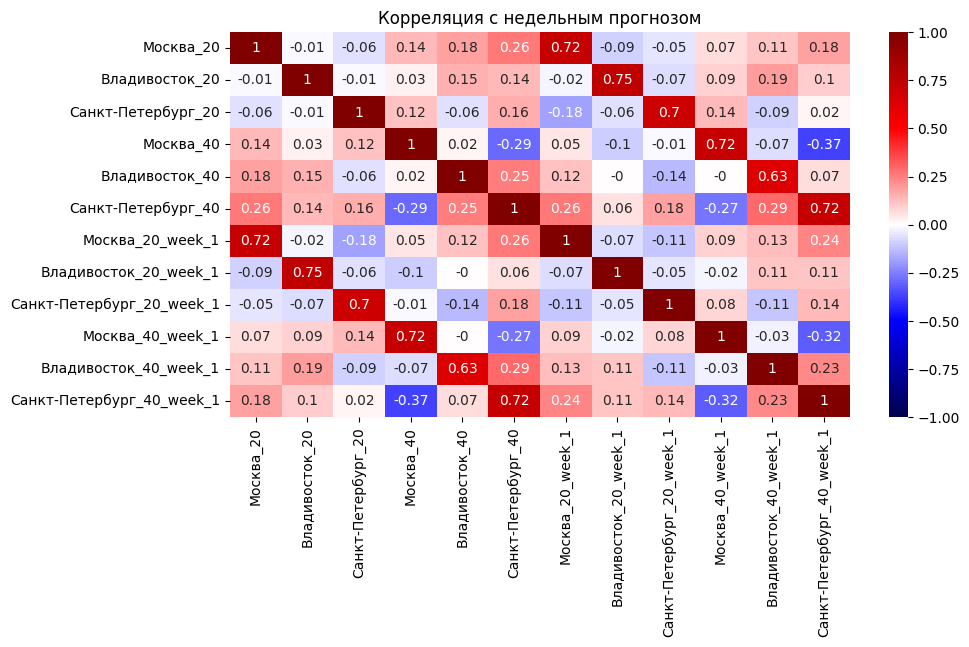

In [11]:
df_empty_count.shift(-7).rename(columns=lambda x: f"{x}_week_1")

plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.concat([
        df_empty_count,
        df_empty_count.shift(-7).rename(columns=lambda x: f"{x}_week_1"),
    ],axis=1).corr().round(2),
    cmap='seismic', 
    cbar=True,
    annot=True,
    vmin=-1, vmax=1
    )
plt.title('Корреляция с недельным прогнозом')
plt.show()

Вывод:

Тут мы добаляем в матрицу значения через неделю для того, что бы посмотреть влияние текущих значений на будующие.

* Крассные диагонали показывают нам, что прошлые значения влияют на будущие.
* `Москва_40` - `Санкт-Петербург_40_week_1` `-0.37` чем больше в Москве сегодня тем меньше в СПБ через неделю

По этой матрице нужно делать выводы аккуратно не забывая о здравом смысле.

## Первая модель

Заметив линейные зависимости в данных мы смело можем приступать к созданию первых моедлей и смотреть, что получится.

In [12]:
forecast_days = 7

X = df_empty_count.iloc[:-forecast_days]
y = df_empty_count.shift(-forecast_days).iloc[:-forecast_days]

start_test = pd.to_datetime('2007-06-01')

X_train = X[:start_test-pd.Timedelta(days=1)]
X_test = X[start_test:]
y_train = y[:start_test-pd.Timedelta(days=1)]
y_test = y[start_test:]

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
from sklearn.metrics import mean_squared_error, \
    mean_absolute_error, \
    mean_absolute_percentage_error, \
    r2_score

# Предсказание на тестовой выборке
y_pred = lr.predict(X_test)

# Оценка модели
print(f'Среднеквадратическая ошибка: {mean_squared_error(y_test, y_pred)}')
print(f'Средняя абсолютная ошибка: {mean_absolute_error(y_test, y_pred)}')
print(f'Средняя абсолютная процентная ошибка: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

Среднеквадратическая ошибка: 3.041544428852346
Средняя абсолютная ошибка: 1.347231618726039
Средняя абсолютная процентная ошибка: 0.2744921998160392
R2: 0.3173876704252804


/tmp/ipykernel_22817/1554407392.py:6: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(y_test.index, y_pred[:, y_test.columns.get_loc(column)], label='Predicted', color='red')


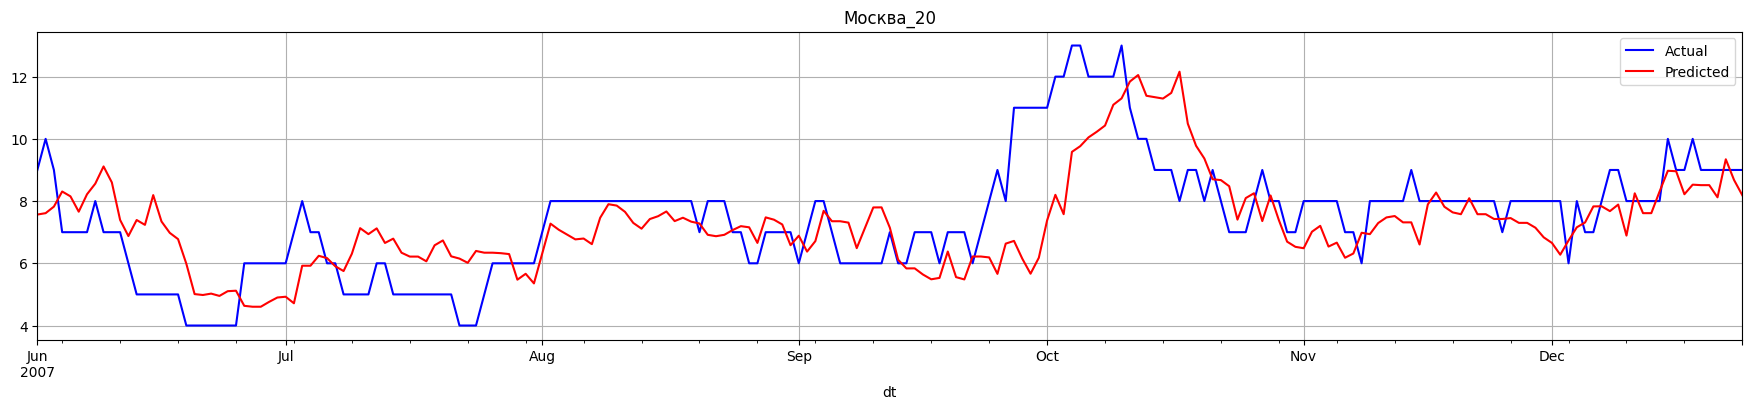

/tmp/ipykernel_22817/1554407392.py:6: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(y_test.index, y_pred[:, y_test.columns.get_loc(column)], label='Predicted', color='red')


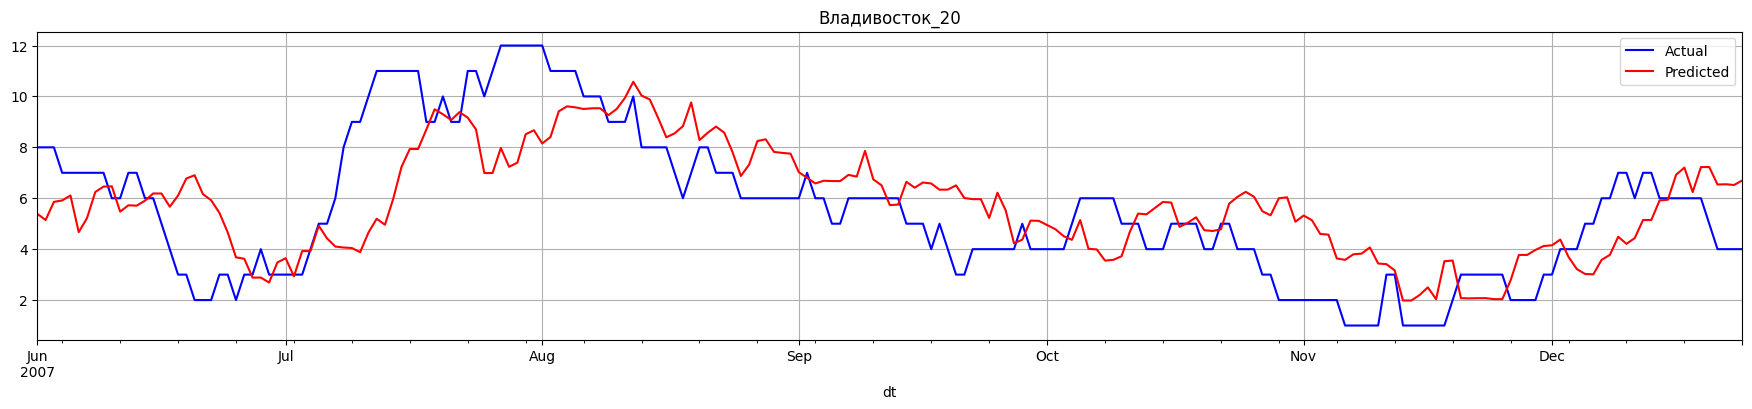

/tmp/ipykernel_22817/1554407392.py:6: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(y_test.index, y_pred[:, y_test.columns.get_loc(column)], label='Predicted', color='red')


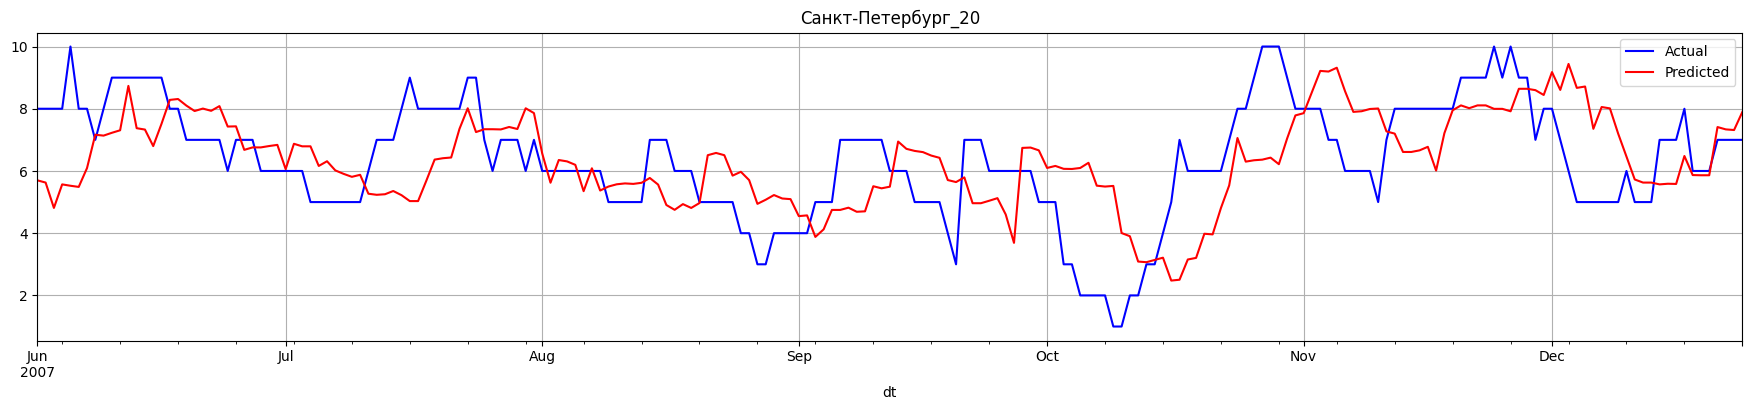

/tmp/ipykernel_22817/1554407392.py:6: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(y_test.index, y_pred[:, y_test.columns.get_loc(column)], label='Predicted', color='red')


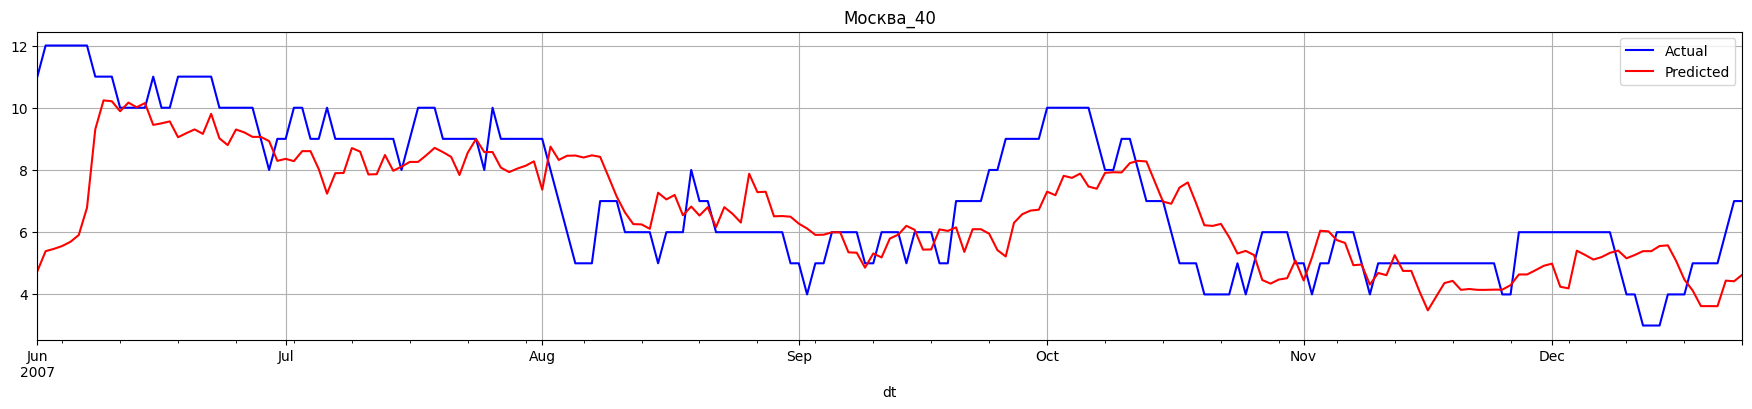

/tmp/ipykernel_22817/1554407392.py:6: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(y_test.index, y_pred[:, y_test.columns.get_loc(column)], label='Predicted', color='red')


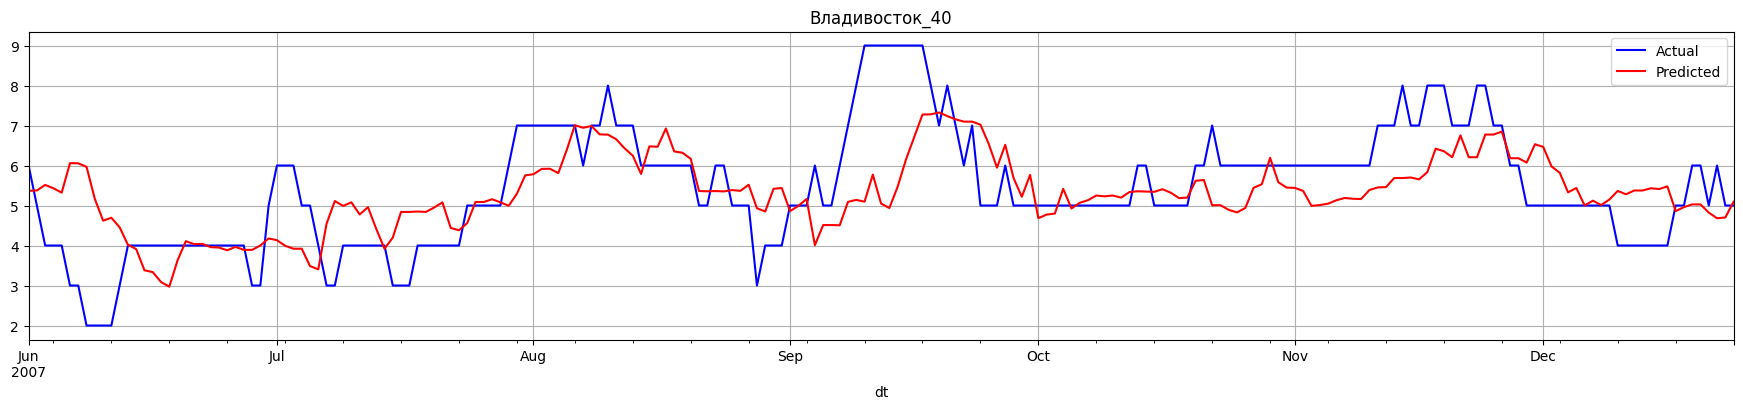

/tmp/ipykernel_22817/1554407392.py:6: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(y_test.index, y_pred[:, y_test.columns.get_loc(column)], label='Predicted', color='red')


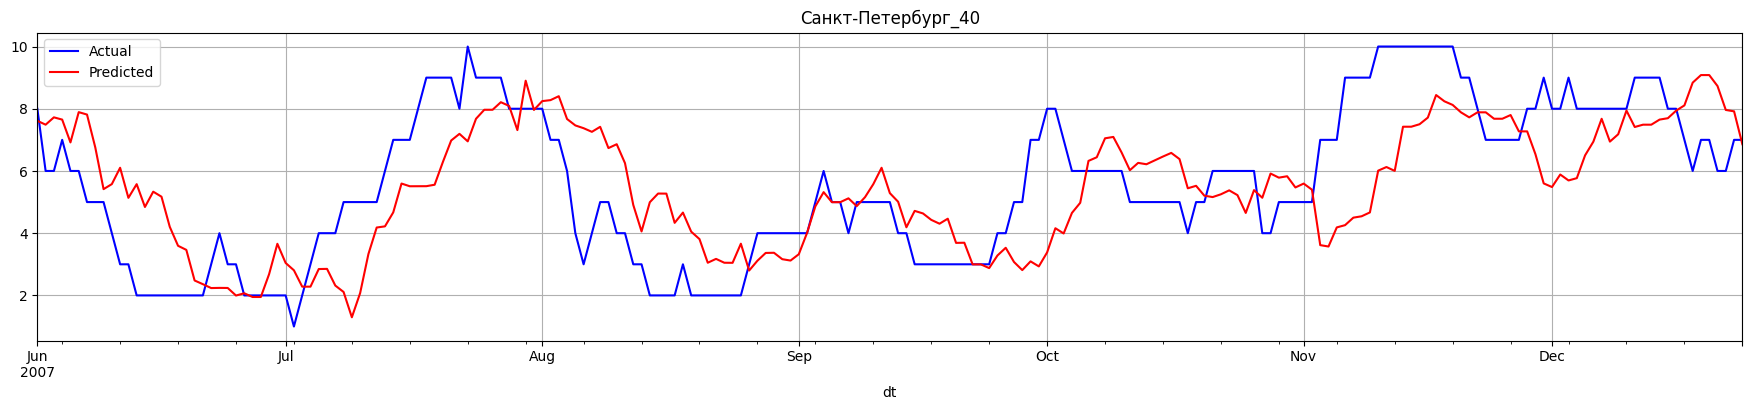

In [15]:
y_pred = lr.predict(X_test)

for column in y_test.columns:
    plt.figure(figsize=(22, 4))
    y_test[column].plot(grid=True, label='Actual', color='blue')
    plt.plot(y_test.index, y_pred[:, y_test.columns.get_loc(column)], label='Predicted', color='red')
    plt.title(column)
    plt.legend()
    plt.show()

Вывод:

Наша предсказательная модель явно отстает от испиных значений. Это обычное поиделие для моделей построенных на осонове предыдущих значений.

## Анализ таблицы событий 

Для улучшения прогноза необходимо произвести анализ псех событий происходящих с контейнерами.

Одина из очевидных гепотиз, что через неделю будут свободными те контейнеры, которые уже в пути.

In [ ]:
df_events = pd.read_csv('https://raw.githubusercontent.com/Mikhaylov-yv/cnt_predict_lesson/refs/heads/main/data/cnt_events.csv')
df_events['dt'] = pd.to_datetime(df_events['dt'])
df_events = df_events.set_index('dt')
df_events

,event,cnt_id,cnt_type,location_name,end_location_name
dt,,,,,
2006-01-01,Прибыл_свободным,STNU5088417,40,Санкт-Петербург,NaN
2006-01-02,Прибыл_свободным,CRTU6264170,40,Санкт-Петербург,NaN
2006-01-02,Прибыл_свободным,KNYU6806102,20,Владивосток,NaN
2006-01-02,Прибыл_свободным,STNU2517447,40,Владивосток,NaN
2006-01-02,Передан_на_погрузку,STNU2517447,40,Владивосток,NaN
...,...,...,...,...,...
2007-12-31,Прибыл_груженый,TIMU5293271,20,Москва,NaN
2007-12-31,Прибыл_по_ЖД,TOWU6899546,20,Владивосток,NaN
2007-12-31,Отправлен_грузополучателю,TOWU6899546,20,Владивосток,NaN


In [17]:
# Обзор данных
for col in df_events.columns:
    print('='*50)
    print(col)
    vals__list = df_events[col].unique()
    print(f"Уникальных значений: {len(vals__list)}")
    print(vals__list)
    print('='*50)

event
Уникальных значений: 6
['Прибыл_свободным' 'Передан_на_погрузку' 'Прибыл_груженый'
 'Отправлен_по_ЖД' 'Прибыл_по_ЖД' 'Отправлен_грузополучателю']
cnt_id
Уникальных значений: 100
['STNU5088417' 'CRTU6264170' 'KNYU6806102' 'STNU2517447' 'STNU3092282'
 'BUTU7001309' 'ERKU5797068' 'KNYU3537798' 'TOWU6899546' 'ERKU8324044'
 'KNYU8173059' 'STNU4510100' 'KNYU1437543' 'TOWU3611630' 'WEDU2383938'
 'ERKU5435191' 'CRTU8114609' 'ERKU3123425' 'WEDU6654977' 'CRTU1937935'
 'KNYU5372067' 'KNYU6970613' 'TIMU5293271' 'CRTU1521773' 'CRTU2093770'
 'STNU6396019' 'TIMU8250428' 'CRTU3557001' 'TOWU5892461' 'WEDU6874585'
 'CRTU3557936' 'BUTU2391445' 'CRTU1715325' 'KNYU5786200' 'STNU9487869'
 'TIMU3656871' 'TOWU5842316' 'KNYU1824938' 'TOWU7931879' 'WEDU9910122'
 'STNU1402586' 'TIMU8061928' 'WEDU4651205' 'WEDU8568487' 'KNYU9683883'
 'TOWU2984334' 'WEDU5817433' 'TIMU8887794' 'WEDU7000544' 'BUTU8729025'
 'TOWU7808384' 'TOWU8351331' 'BUTU7079823' 'TOWU2940273' 'BUTU1300953'
 'ERKU3112209' 'ERKU4123975' 'STNU2

In [18]:
# Важно посмотреть глазами историю 1-го контейнера для понимания природы данных
df_events.loc[lambda d: d['cnt_id']=='BUTU2391445'][:16]

,event,cnt_id,cnt_type,location_name,end_location_name
dt,,,,,
2006-01-12,Прибыл_свободным,BUTU2391445,20,Владивосток,NaN
2006-01-29,Передан_на_погрузку,BUTU2391445,20,Владивосток,NaN
2006-02-13,Прибыл_груженый,BUTU2391445,20,Владивосток,NaN
2006-02-16,Отправлен_по_ЖД,BUTU2391445,20,Владивосток,Москва
2006-02-25,Прибыл_по_ЖД,BUTU2391445,20,Москва,NaN
2006-02-27,Отправлен_грузополучателю,BUTU2391445,20,Москва,NaN
2006-03-14,Прибыл_свободным,BUTU2391445,20,Москва,NaN
2006-03-14,Передан_на_погрузку,BUTU2391445,20,Москва,NaN
2006-03-20,Прибыл_груженый,BUTU2391445,20,Москва,NaN


In [27]:
def event_counts_over_time(
    df_events: pd.DataFrame,
    group_cols: list[str],
    event_filter: str,
) -> pd.DataFrame:
    """
    Подсчитывает количество контейнеров с последним событием `event_filter`
    для каждой комбинации столбцов в `group_cols` по всем датам из диапазона индекса `df_events`.

    Параметры:
    - df_events: DataFrame с датами в индексе и колонками ['cnt_id', 'event', ...]
    - group_cols: список столбцов для группировки (например, ['location_name', 'end_location_name', 'cnt_type'])
    - event_filter: значение в столбце 'event' для отбора (по умолчанию 'Отправлен_по_ЖД')

    Возвращает:
    - DataFrame, где индекс — даты, столбцы — комбинации group_cols,
      значения — количество контейнеров с последним событием event_filter.
    """
    # Диапазон дат по индексу
    dates = pd.date_range(
        start=df_events.index.min(),
        end=df_events.index.max()
    )

    # Собираем промежуточные результаты в список
    frames = []
    for current_day in dates:
        # Выбираем события до текущей даты и оставляем последнее по cnt_id
        last = (
            df_events.loc[:current_day]
            .groupby('cnt_id', observed=True, as_index=False)
            .last()
        )
        # Фильтруем по нужному событию и считаем
        filtered = last[last['event'] == event_filter]
        counts = (
            filtered
            .groupby(group_cols, as_index=False)['cnt_id']
            .count()
            .rename(columns={'cnt_id': 'count'})
        )
        counts['dt'] = current_day
        frames.append(counts)

    # Объединяем и перестраиваем
    result = (
        pd.concat(frames, ignore_index=True)
        .sort_values(['dt'] + group_cols)
    )
    pivoted = (
        result
        .pivot(index='dt', columns=group_cols, values='count')
        .fillna(0)
        .astype(int)
    )
    # Уплощаем MultiIndex столбцов
    pivoted.columns = ["_".join(map(str, col)) for col in pivoted.columns]

    return pivoted


In [26]:
# Пример использования:
df_trnsports = event_counts_over_time(df_events, ['location_name', 'end_location_name', 'cnt_type'], 'Отправлен_по_ЖД')
df_trnsports

,Владивосток_Санкт-Петербург_20,Москва_Владивосток_20,Владивосток_Москва_40,Москва_Санкт-Петербург_20,Владивосток_Санкт-Петербург_40,Санкт-Петербург_Владивосток_40,Москва_Владивосток_40,Москва_Санкт-Петербург_40,Санкт-Петербург_Москва_20,Санкт-Петербург_Владивосток_20,Владивосток_Москва_20,Санкт-Петербург_Москва_40
dt,,,,,,,,,,,,
2006-01-04,1,0,0,0,0,0,0,0,0,0,0,0
2006-01-05,1,0,0,0,0,0,0,0,0,0,0,0
2006-01-06,1,0,0,0,0,0,0,0,0,0,0,0
2006-01-07,1,0,0,0,0,0,0,0,0,0,0,0
2006-01-08,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2007-12-27,3,1,1,0,1,3,2,0,1,4,1,0
2007-12-28,3,1,1,0,1,3,2,0,1,5,1,0
2007-12-29,3,2,1,0,1,3,2,0,1,5,2,0


Вывод:

Такими группирвками мы можем преобразовать список событий в значимые `фичи`